In [475]:
import pandas as pd
# Load datasets
macro_data = pd.read_csv("../data/processed_data/macro_economic.csv")
events_Holidays_data = pd.read_csv("../data/processed_data/events_Holidays_data.csv")
weather_data = pd.read_csv("../data/processed_data/weather_data.csv")
train_data = pd.read_csv("../data/processed_data/train.csv")
test_data = pd.read_csv("../data/processed_data/Submission.csv")
kaggle_submission_form = pd.read_csv("../data/processed_data/Kaggle_Submission_Format.csv")

In [476]:
train_data['date'] = pd.to_datetime(train_data[['Year', 'Month']].assign(day=1))
train_data['date'] = train_data.date.dt.to_period('M')
train_data.drop(columns=['Year', 'Month'], inplace=True)
train_data.fillna(0,inplace=True)
train_data.set_index('date', inplace=True)

train_data.head()

,ProductCategory,Sales(In ThousandDollars)
date,,
2009-01,WomenClothing,1755.0
2009-01,MenClothing,524.0
2009-01,OtherClothing,936.0
2009-02,WomenClothing,1729.0
2009-02,MenClothing,496.0


#  Split the dataset by the clothing category

In [477]:


women_clothing_data = train_data[train_data['ProductCategory'] == 'WomenClothing']
women_clothing_data.drop(columns=['ProductCategory'], inplace=True)
women_clothing_data.fillna(method='bfill',inplace=True)
men_clothing_data = train_data[train_data['ProductCategory'] == 'MenClothing']
men_clothing_data.drop(columns=['ProductCategory'], inplace=True)
men_clothing_data.fillna(method='bfill',inplace=True)
other_clothing_data = train_data[train_data['ProductCategory'] == 'OtherClothing']
other_clothing_data.drop(columns=['ProductCategory'], inplace=True)
other_clothing_data.fillna(method='bfill',inplace=True)



idx_women = women_clothing_data.index[women_clothing_data['Sales(In ThousandDollars)'] ==0]
idx_men = men_clothing_data.index[men_clothing_data['Sales(In ThousandDollars)'] ==0]
idx_other = other_clothing_data.index[other_clothing_data['Sales(In ThousandDollars)'] ==0]


/tmp/ipykernel_137204/885686471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_clothing_data.drop(columns=['ProductCategory'], inplace=True)
/tmp/ipykernel_137204/885686471.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  women_clothing_data.fillna(method='bfill',inplace=True)
/tmp/ipykernel_137204/885686471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_clothing_data.fillna(method='bfill',inplace=True)
/tmp/ipykernel_137204/885686471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [478]:
train_data['Sales(In ThousandDollars)'].fillna((train_data['Sales(In ThousandDollars)'].mean()),
                                               inplace=True)

/tmp/ipykernel_137204/2795247986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Sales(In ThousandDollars)'].fillna((train_data['Sales(In ThousandDollars)'].mean()),


# Load and format supplemetary data

In [479]:
events_Holidays_data['MonthDate'] = events_Holidays_data['MonthDate'].astype(str)
events_Holidays_data['Month'] = events_Holidays_data['MonthDate'].apply(lambda x: x.split('-')[1])
events_Holidays_data['Month'] = events_Holidays_data['Month'].astype(int)
events_Holidays_data.drop(events_Holidays_data.index[events_Holidays_data['Event'] == "'New Year's Day' observed"], inplace=True)

events_Holidays_data.drop(columns=['MonthDate', 'Event'], inplace=True)

events_Holidays_data['date'] = pd.to_datetime(events_Holidays_data[['Year', 'Month']].assign(day=1))
events_Holidays_data['date'] = events_Holidays_data.date.dt.to_period('M')
events_Holidays_data.drop(columns=['Year', 'Month'], inplace=True)
events_Holidays_data.set_index('date', inplace=True)

In [480]:
events_holidays_dummies = pd.get_dummies(data=events_Holidays_data, columns=['DayCategory'])
events_holidays_count = events_holidays_dummies.groupby('date').sum()
events_holidays_count.rename(columns={'DayCategory_Event': 'Events', 'DayCategory_Federal Holiday': 'Holidays'}, inplace=True)

In [481]:
weather_data = pd.read_excel('../data/raw_data/WeatherData.xlsx', sheet_name=None)
for key in weather_data.keys():
    weather_data[key]['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
    weather_data[key]['Year'] = key
    weather_data[key]['date'] = pd.to_datetime(weather_data[key][['Year', 'Month', 'Day']], format='%y%m%d')
    weather_data[key]['date'] = weather_data[key].date.dt.to_period('M')
    weather_data[key]['WeatherEvent'].replace(to_replace=r'^[A-Za-z]', value=1, regex=True, inplace=True)
    weather_data[key]['WeatherEvent'].fillna(0, inplace=True)
    weather_data[key]['WeatherEvent'].astype('int64')
    weather_data[key].fillna(0, inplace=True)
    weather_data[key] = weather_data[key][['date', 'Temp avg (°C)', 'Dew Point avg (°C)', 'Humidity\xa0(%) avg', 'Sea Level Press.\xa0(hPa) high', 'Visibility\xa0(km) high', \
                                       'WeatherEvent','Wind\xa0(km/h) avg']]
    weather_data[key]['Temp avg (°C)'] = weather_data[key]['Temp avg (°C)'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Dew Point avg (°C)'] = weather_data[key]['Dew Point avg (°C)'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Humidity\xa0(%) avg'] = weather_data[key]['Humidity\xa0(%) avg'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Sea Level Press.\xa0(hPa) high'] = weather_data[key]['Sea Level Press.\xa0(hPa) high'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Visibility\xa0(km) high'] = weather_data[key]['Visibility\xa0(km) high'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key]['Wind\xa0(km/h) avg'] = weather_data[key]['Wind\xa0(km/h) avg'].apply(lambda x: float(x) if x!='-' else 0)
    weather_data[key].set_index('date', inplace=True)
    weather_event = weather_data[key].groupby(['date'])['WeatherEvent'].sum()

    weather_data[key] = weather_data[key].drop(columns=['WeatherEvent']).groupby('date').median()

    weather_data[key]['WeatherEvent'] = weather_event


/tmp/ipykernel_137204/466781037.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_data[key]['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
/tmp/ipykernel_137204/466781037.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

In [483]:
weather_concat = pd.concat([weather_data[key] for key in weather_data.keys()])

In [482]:
macro_economic_data = pd.read_excel('../data/raw_data/macro_economic.xlsx')
macro_economic_data['Year'] = macro_economic_data['Year-Month'].apply(lambda x: int(x.split('-')[0]))
macro_economic_data['Month'] = macro_economic_data['Year-Month'].apply(lambda x: x.split('-')[1])
macro_economic_data['Month'] = macro_economic_data['Month'].apply(lambda x: x.strip())
macro_economic_data['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
macro_economic_data['date'] = pd.to_datetime(macro_economic_data[['Year', 'Month']].assign(day=1))
macro_economic_data['date'] = macro_economic_data.date.dt.to_period('M')
macro_economic_data.drop(columns=['Year-Month', 'PartyInPower', 'Year', 'Month', 'AdvertisingExpenses (in Thousand Dollars)'], inplace=True)
macro_economic_data.set_index('date', inplace=True)

/tmp/ipykernel_137204/2646237942.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  macro_economic_data['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
/tmp/ipykernel_137204/2646237942.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_optio

In [484]:
macro_economic_data

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
date,,,,,,,,,,,,,,,
2009-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550
2009-02,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100
2009-03,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650
2009-04,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225
2009-05,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.520,12.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08,18741.599947,16797.206610,264.160,4.9,12.51,9.64,25.52,80.26,-0.99,9.824,9.340,787,15.314,3.575,10.950
2016-09,18840.309646,16852.562745,264.602,4.9,12.51,9.64,25.74,77.86,-2.99,9.950,9.464,790,15.580,3.475,10.950
2016-10,18740.780023,16725.460098,264.738,4.8,12.51,9.64,26.04,78.52,0.85,9.950,9.464,785,15.472,3.475,11.425


In [452]:
combined = macro_economic_data.merge(weather_concat, on='date')
combined = combined.merge(events_holidays_count, on='date', how='left')
combined.fillna(0, inplace=True)

# Create functions for Mutual Information to select features

In [485]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

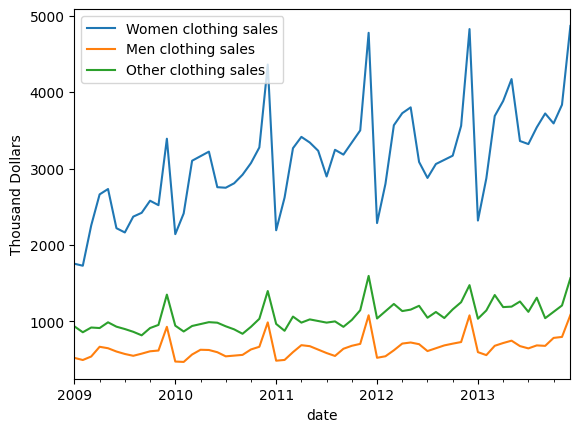

In [486]:
ax = women_clothing_data.drop(idx_women).plot(y='Sales(In ThousandDollars)', label='Women clothing sales', ylabel='Thousand Dollars')
men_clothing_data.drop(idx_men).plot(y='Sales(In ThousandDollars)', ax=ax, label='Men clothing sales')
other_clothing_data.drop(idx_other).plot(y='Sales(In ThousandDollars)', ax=ax, label='Other clothing sales')
plt.show()

# Explore the trend on the Women Clothing example

In [510]:
women_clothing_train = women_clothing_data.loc['2009-01-01':'2012-12-01']
women_clothing_val = women_clothing_data.loc['2013-01-01':'2013-12-01']

# Use DeterministicProcess to engineer time dummies for modeling trend with Lienar Regression

In [511]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index=women_clothing_train.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()
# out_sample features used for forecasting
X_fore = dp.out_of_sample(steps=12)

In [512]:
X.drop(idx_women, inplace=True)

In [515]:
X.head()

,const,trend,trend_squared
date,,,
2009-01,1.0,1.0,1.0
2009-02,1.0,2.0,4.0
2009-03,1.0,3.0,9.0
2009-04,1.0,4.0,16.0
2009-05,1.0,5.0,25.0


In [516]:
from sklearn.linear_model import LinearRegression
y = women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

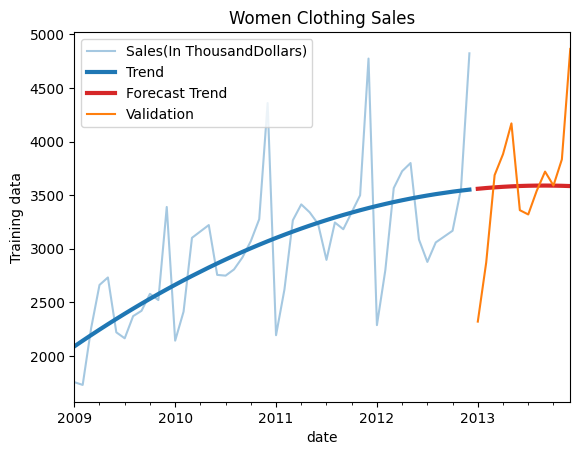

In [518]:
import matplotlib.pyplot as plt

# Plotting training data, trend, and forecast
ax = y.plot(alpha=0.4, title="Women Clothing Sales", ylabel='Training data')
y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
y_fore.plot(ax=ax, linewidth=3, label="Forecast Trend", color='C3')

# Plotting validation data
women_clothing_val.plot(ax=ax, y='Sales(In ThousandDollars)', label='Validation')

# Adding legend
ax.legend()

# Show the plot
plt.show()


# Model seasonality

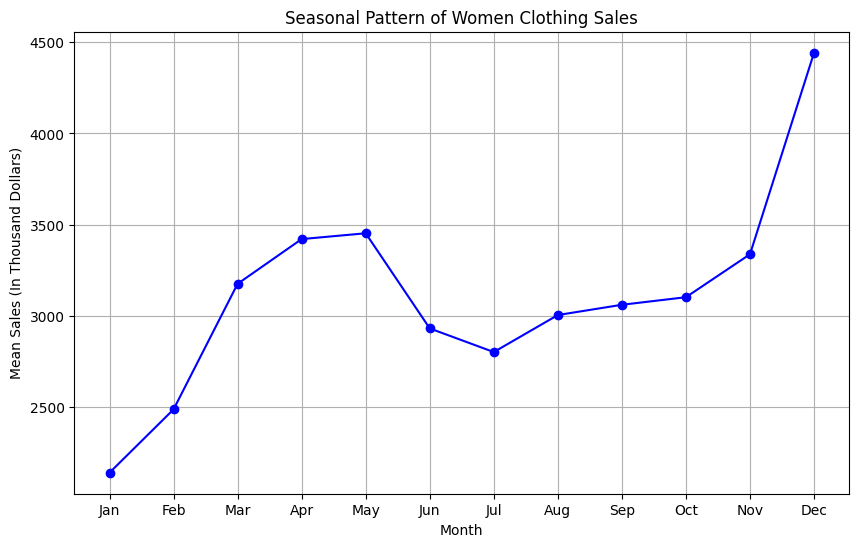

In [522]:
import pandas as pd
import matplotlib.pyplot as plt
X = women_clothing_data.drop(idx_women)
X['year'] = X.index.year
X['month'] = X.index.month
y = X['Sales(In ThousandDollars)']  # Assuming this is how y is defined

# Group by month and calculate mean sales
monthly_mean = X.groupby('month')['Sales(In ThousandDollars)'].mean()

# Plotting the seasonal pattern
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', linestyle='-', color='b')
plt.title('Seasonal Pattern of Women Clothing Sales')
plt.xlabel('Month')
plt.ylabel('Mean Sales (In Thousand Dollars)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


# The time series shows seasonal behavior that can be described by adding seasonal and Fourier terms to the function

In [523]:
fourier = CalendarFourier(freq='A', order=4)

dp = DeterministicProcess(
    index=women_clothing_train.index,
    constant=True,
    order=2,
    seasonal=True,  
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample() 
X_fore = dp.out_of_sample(steps=12)
X.drop(idx_women, inplace=True)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [524]:
y = women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

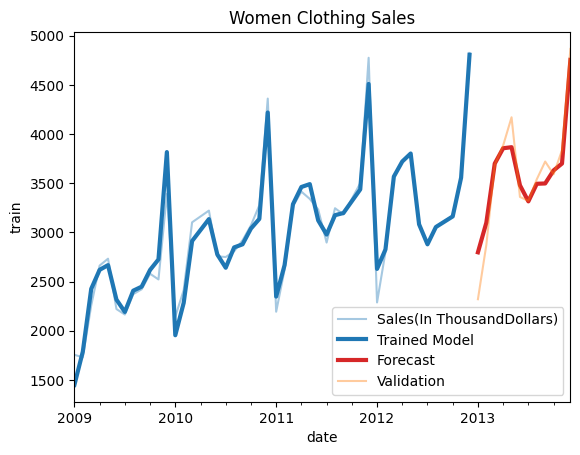

In [525]:
import matplotlib.pyplot as plt

# Plotting the data and forecasts
ax = y.plot(alpha=0.4, title="Women Clothing Sales", ylabel='train')
y_pred.plot(ax=ax, linewidth=3, label="Trained Model", color='C0')
y_fore.plot(ax=ax, linewidth=3, label="Forecast", color='C3')
women_clothing_val.plot(ax=ax, y='Sales(In ThousandDollars)', label='Validation', alpha=0.4)

# Adding legend and showing the plot
ax.legend()
plt.show()


In [526]:
print('RSME train: ', np.sqrt(mean_squared_error(y, y_pred)))
print('RSME validation: ', np.sqrt(mean_squared_error(y_fore, women_clothing_val['Sales(In ThousandDollars)'])))

RSME train:  132.3096844376603
RSME validation:  197.88114599342288


<Axes: title={'center': 'Residuals'}, xlabel='date'>

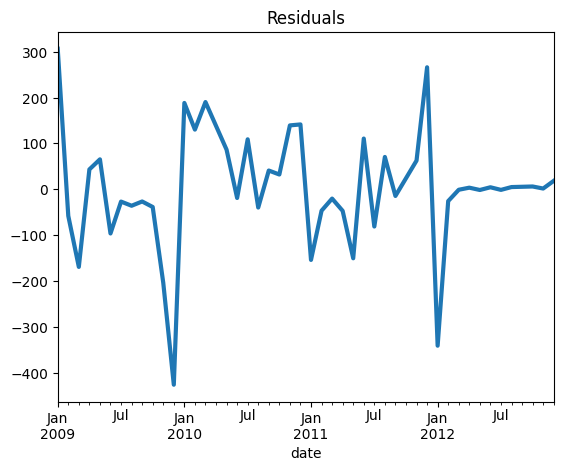

In [527]:
y_resid = y - y_pred
y_resid.plot(linewidth=3, title="Residuals", color='C0')

#  Hybrid model class

In [528]:
class Hybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2

In [529]:
def fit(self, X_1, X_2, y):
   
    self.model_1.fit(X_1, y)

    y_fit = pd.Series(
        self.model_1.predict(X_1), 
        index=X_1.index,
    )

    y_resid = y - y_fit

    self.model_2.fit(X_2, y_resid)

    self.y_fit = y_fit
    self.y_resid = y_resid

# Add method to class
Hybrid.fit = fit

In [530]:
def predict(self, X_1, X_2):
    y_pred = pd.DataFrame(
        self.model_1.predict(X_1), 
        index=X_1.index
    )
    y_pred = y_pred.stack().squeeze()  # wide to long

    y_pred += self.model_2.predict(X_2)
    
    return y_pred.unstack()  # long to wide


# Add method to class
Hybrid.predict = predict

# Use the created class for forecasting Women Clothing Sales with Linear Regression (trend+seasonality) and Random Forest Regression on the selected fetures

In [552]:
fourier = CalendarFourier(freq='A', order=4)

dp = DeterministicProcess(
    index=women_clothing_train.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
    seasonal=True,
    additional_terms=[fourier]
)
# `in_sample` creates features for the dates given in the `index` argument
X_1 = dp.in_sample()
# out_sample features used for forecasting
X_1_fore = dp.out_of_sample(steps=12)
X_1.drop(idx_women, inplace=True)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:569: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index = pd.date_range("2020-01-01", freq=freq, periods=1)


In [553]:
mi_scores = make_mi_scores(combined['2009-01':'2013-12'].drop(idx_women), women_clothing_data['Sales(In ThousandDollars)'].drop(idx_women))
mi_scores[0:8]

Monthly Real GDP Index (inMillion$)               0.443470
Monthly Nominal GDP Index (inMillion$)            0.423520
CPI                                               0.363895
unemployment rate                                 0.311836
Cotton Monthly Price - US cents per Pound(lbs)    0.269226
Average upland planted(million acres)             0.265093
Earnings or wages  in dollars per hour            0.246923
Events                                            0.218622
Name: MI Scores, dtype: float64

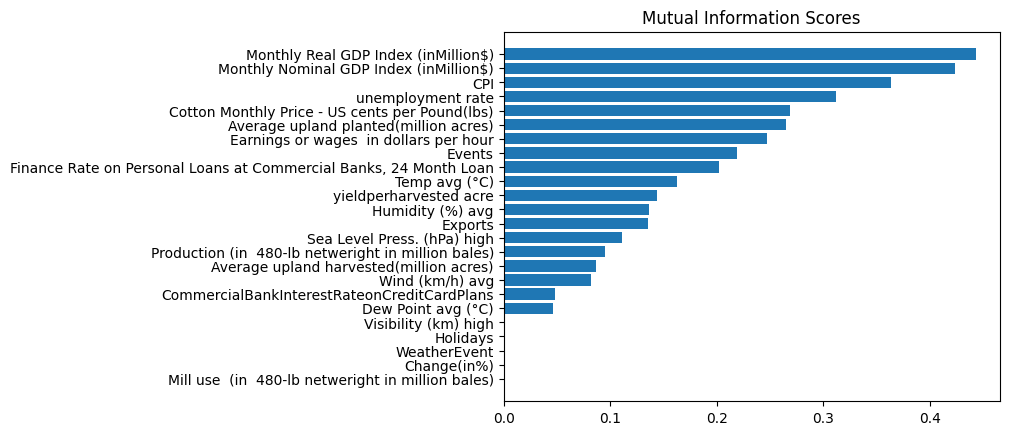

In [554]:
plot_mi_scores(mi_scores)

In [555]:
women_clothing_features_selected = combined[['Monthly Real GDP Index (inMillion$)', 'Monthly Nominal GDP Index (inMillion$)', 'CPI', 'unemployment rate', \
                                                            'Cotton Monthly Price - US cents per Pound(lbs)', 'Average upland planted(million acres)', 'Earnings or wages  in dollars per hour']]
women_clothing_features_train = women_clothing_features_selected.loc['2009-01':'2012-12']
women_clothing_features_test = women_clothing_features_selected.loc['2013-01':'2013-12']
X_2 = women_clothing_features_train
X_2_fore = women_clothing_features_test
X_2.drop(idx_women, inplace=True)

/tmp/ipykernel_137204/2821421284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.drop(idx_women, inplace=True)


# RF Regression for residuals

In [558]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = Hybrid(
    model_1=LinearRegression(),
    model_2=RandomForestRegressor(),
)

In [565]:
y =  women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)
model.fit(X_1,X_2,y)
y_pred = model.predict(X_1, X_2)
y_fore = model.predict(X_1_fore, X_2_fore)

#  XGBoost for residuals

In [568]:
from xgboost import XGBRegressor
model = Hybrid(
    model_1=LinearRegression(),
    model_2=XGBRegressor(),
)

In [570]:
# y =  women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)
# model.fit(X_1, X_2, y)
# y_pred = model.predict(X_1, X_2)
# y_fore = model.predict(X_1_fore, X_2_fore)

In [571]:
class Hybrid:
    def __init__(self):
        # Initialize internal models
        self.model_1 = LinearRegression()
        self.model_2 = GradientBoostingRegressor()

    def fit(self, X_1, X_2, y):
        # Fit internal models
        self.model_1.fit(X_1, y)
        self.model_2.fit(X_2, y)

    def predict(self, X_1, X_2):
        # Predict using internal models
        pred_1 = self.model_1.predict(X_1)
        pred_2 = self.model_2.predict(X_2)
        
        # Combine predictions, e.g., averaging
        combined_pred = (pred_1 + pred_2) / 2
        return combined_pred


In [580]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
# Prepare the target variable
y = women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)

# Define and fit the hybrid model
model = Hybrid()
model.fit(X_1, X_2, y)

# Make predictions
y_pred = model.predict(X_1, X_2)
y_fore = model.predict(X_1_fore, X_2_fore)

# Evaluate the model
rmse_train = mean_squared_error(y, y_pred, squared=False)
print(f'Training RMSE: {rmse_train}')

# Assuming you have true values for the forecast period to evaluate RMSE
y_true_fore = women_clothing_features_test['2013-01':'2013-12']  
rmse_fore = mean_squared_error(y_true_fore, y_fore, squared=False)
print(f'Forecast RMSE: {rmse_fore}')


Training RMSE: 97.83808236009332


/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: y_true and y_pred have different number of output (7!=1)

In [579]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming combined is already defined as the complete dataset
combined['Category'] = 0  # Encode the category as 0 for women's clothing

# Prepare the additional features
women_clothing_features_selected = combined[['Monthly Real GDP Index (inMillion$)', 
                                             'Monthly Nominal GDP Index (inMillion$)', 
                                             'CPI', 'unemployment rate',
                                             'Cotton Monthly Price - US cents per Pound(lbs)', 
                                             'Average upland planted(million acres)', 
                                             'Earnings or wages  in dollars per hour']]

women_clothing_features_train = women_clothing_features_selected.loc['2009-01':'2012-12']
women_clothing_features_test = women_clothing_features_selected.loc['2013-01':'2013-12']

# Prepare the main features
X_1 = women_clothing_train[['Year', 'Month', 'Category']]
X_1_fore = train_data[['Year', 'Month', 'Category']]
X_2 = women_clothing_features_train.drop(idx_women)
X_2_fore = women_clothing_features_test

# Prepare the target variable
y = women_clothing_train['Sales(In ThousandDollars)'].drop(idx_women)

# Reshape data for LSTM
n_timesteps = 1  # Set number of timesteps for LSTM input
n_features = X_2.shape[1]

def reshape_for_lstm(data, n_timesteps):
    return data.values.reshape((data.shape[0], n_timesteps, data.shape[1]))

X_3 = reshape_for_lstm(X_2, n_timesteps)
X_3_fore = reshape_for_lstm(X_2_fore, n_timesteps)

class Hybrid:
    def __init__(self):
        self.model_1 = LinearRegression()
        self.model_2 = GradientBoostingRegressor()
        self.model_3 = RandomForestRegressor()
        self.model_4 = self._build_lstm_model()

    def _build_lstm_model(self):
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        return model

    def fit(self, X_1, X_2, y, X_3):
        self.model_1.fit(X_1, y)
        self.model_2.fit(X_2, y)
        self.model_3.fit(X_2, y)
        self.model_4.fit(X_3, y, epochs=200, verbose=0)

    def predict(self, X_1, X_2, X_3):
        pred_1 = self.model_1.predict(X_1)
        pred_2 = self.model_2.predict(X_2)
        pred_3 = self.model_3.predict(X_2)
        pred_4 = self.model_4.predict(X_3)
        combined_pred = (pred_1 + pred_2 + pred_3 + pred_4) / 4
        return combined_pred

# Define and fit the hybrid model
model = Hybrid()
model.fit(X_1, X_2, y, X_3)

# Make predictions
y_pred = model.predict(X_1, X_2, X_3)
y_fore = model.predict(X_1_fore, X_2_fore, X_3_fore)

# Evaluate the model
rmse_train = mean_squared_error(y, y_pred, squared=False)
print(f'Training RMSE: {rmse_train}')

# Assuming you have true values for the forecast period to evaluate RMSE
y_true_fore = women_clothing_test['Sales(In ThousandDollars)']  # Replace with actual true values
rmse_fore = mean_squared_error(y_true_fore, y_fore, squared=False)
print(f'Forecast RMSE: {rmse_fore}')


2024-07-13 18:14:25.979071: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 18:14:26.120987: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 18:14:27.321759: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 18:14:27.831863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 18:14:29.711350: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

KeyError: "None of [Index(['Year', 'Month', 'Category'], dtype='object')] are in the [columns]"

In [578]:
from sklearn.ensemble import RandomForestRegressor

class Hybrid:
    def __init__(self):
        # Initialize internal models
        self.model_1 = LinearRegression()
        self.model_2 = GradientBoostingRegressor()
        self.model_3 = RandomForestRegressor()

    def fit(self, X_1, X_2, y):
        # Fit internal models
        self.model_1.fit(X_1, y)
        self.model_2.fit(X_2, y)
        self.model_3.fit(X_2, y)

    def predict(self, X_1, X_2):
        # Predict using internal models
        pred_1 = self.model_1.predict(X_1)
        pred_2 = self.model_2.predict(X_2)
        pred_3 = self.model_3.predict(X_2)
        
        # Combine predictions, e.g., averaging
        combined_pred = (pred_1 + pred_2 + pred_3) / 3
        return combined_pred


In [326]:
test_data = test_data.iloc[:,0:3]
test_data.head()

,Year,Month,ProductCategory
0,2014,1,1
1,2014,1,2
2,2014,1,3
3,2014,2,1
4,2014,2,2


In [327]:
idx_women.isna().sum()

0

In [325]:
events_Holidays_data.isnull().sum()

DayCategory    0
dtype: int64

In [ ]:
kaggle_submission_form

In [ ]:
sns.displot(train_data['Sales(In ThousandDollars)'], kde =True)

In [ ]:
sns.boxplot(data=train_data, x="Year", y='Sales(In ThousandDollars)')

In [ ]:
sns.barplot(data=train_data, x="ProductCategory", y='Sales(In ThousandDollars)')

In [295]:
cat = {'WomenClothing': 1, 'MenClothing':2, 'OtherClothing':3}
       
train_data.replace({"ProductCategory": cat}, inplace=True)
test_data.replace({"ProductCategory": cat}, inplace=True)
train_data.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,1,1755.0
1,2009,1,2,524.0
2,2009,1,3,936.0
3,2009,2,1,1729.0
4,2009,2,2,496.0


In [296]:
test_data.head()

,Year,Month,ProductCategory
0,2014,1,1
1,2014,1,2
2,2014,1,3
3,2014,2,1
4,2014,2,2


In [ ]:
weather_data

In [303]:
weather_concat = pd.concat([weather_data[key] for key in weather_data.keys()])

In [304]:
weather_concat

,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) high,Visibility (km) high,Wind (km/h) avg,WeatherEvent
date,,,,,,,
2009-01,-2.0,-10.0,54.0,1022.0,16.0,11.0,10.0
2009-02,3.0,-6.5,50.0,1023.0,16.0,12.0,6.0
2009-03,7.0,-1.0,56.0,1026.0,16.0,12.0,10.0
2009-04,11.5,2.5,54.5,1021.5,16.0,10.5,12.0
2009-05,17.0,11.0,69.0,1021.0,16.0,8.0,14.0
...,...,...,...,...,...,...,...
2016-08,27.0,19.0,65.0,1019.0,16.0,6.0,10.0
2016-09,23.0,14.0,65.0,1021.5,16.0,7.0,7.0
2016-10,16.0,11.0,68.0,1023.0,16.0,7.0,6.0


/tmp/ipykernel_137204/2646237942.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  macro_economic_data['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec':12}, inplace=True)
/tmp/ipykernel_137204/2646237942.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_optio

In [306]:
macro_economic_data

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
date,,,,,,,,,,,,,,,
2009-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550
2009-02,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100
2009-03,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650
2009-04,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225
2009-05,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.520,12.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08,18741.599947,16797.206610,264.160,4.9,12.51,9.64,25.52,80.26,-0.99,9.824,9.340,787,15.314,3.575,10.950
2016-09,18840.309646,16852.562745,264.602,4.9,12.51,9.64,25.74,77.86,-2.99,9.950,9.464,790,15.580,3.475,10.950
2016-10,18740.780023,16725.460098,264.738,4.8,12.51,9.64,26.04,78.52,0.85,9.950,9.464,785,15.472,3.475,11.425


In [307]:
combined = macro_economic_data.merge(weather_concat, on='date')
combined = combined.merge(events_holidays_count, on='date', how='left')
combined.fillna(0, inplace=True)

In [308]:
combined

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),...,Exports,Temp avg (°C),Dew Point avg (°C),Humidity (%) avg,Sea Level Press. (hPa) high,Visibility (km) high,Wind (km/h) avg,WeatherEvent,Events,Holidays
date,,,,,,,,,,,,,,,,,,,,,
2009-01,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,...,11.550,-2.0,-10.0,54.0,1022.0,16.0,11.0,10.0,0.0,2.0
2009-02,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,...,11.100,3.0,-6.5,50.0,1023.0,16.0,12.0,6.0,1.0,1.0
2009-03,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,...,11.650,7.0,-1.0,56.0,1026.0,16.0,12.0,10.0,0.0,0.0
2009-04,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,...,12.225,11.5,2.5,54.5,1021.5,16.0,10.5,12.0,1.0,0.0
2009-05,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,...,12.300,17.0,11.0,69.0,1021.0,16.0,8.0,14.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08,18741.599947,16797.206610,264.160,4.9,12.51,9.64,25.52,80.26,-0.99,9.824,...,10.950,27.0,19.0,65.0,1019.0,16.0,6.0,10.0,0.0,0.0
2016-09,18840.309646,16852.562745,264.602,4.9,12.51,9.64,25.74,77.86,-2.99,9.950,...,10.950,23.0,14.0,65.0,1021.5,16.0,7.0,7.0,0.0,1.0
2016-10,18740.780023,16725.460098,264.738,4.8,12.51,9.64,26.04,78.52,0.85,9.950,...,11.425,16.0,11.0,68.0,1023.0,16.0,7.0,6.0,1.0,1.0


In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

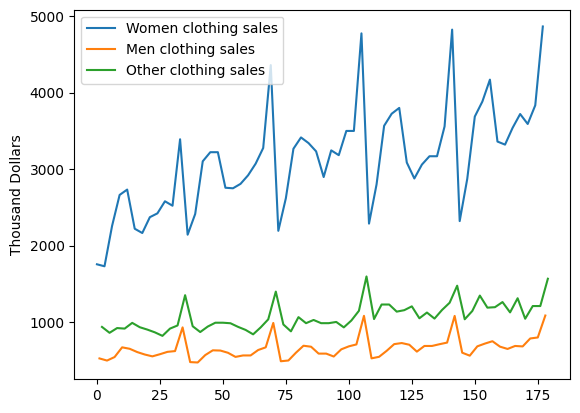

In [309]:
ax = women_clothing_data.drop(idx_women).plot(y='Sales(In ThousandDollars)', label='Women clothing sales', ylabel='Thousand Dollars')
men_clothing_data.drop(idx_men).plot(y='Sales(In ThousandDollars)', ax=ax, label='Men clothing sales')
other_clothing_data.drop(idx_other).plot(y='Sales(In ThousandDollars)', ax=ax, label='Other clothing sales')
plt.show()

In [316]:
 = women_clothing_data.loc['2009-01-01':'2012-12-01']
women_clothing_val = women_clothing_data.loc['2013-01-01':'2013-12-01']

In [317]:
women_clothing_data.head()

,Year,Month,Sales(In ThousandDollars)
0,2009,1,1755.0
3,2009,2,1729.0
6,2009,3,2256.0
9,2009,4,2662.0
12,2009,5,2732.0


In [318]:
y = ['Sales(In ThousandDollars)'].drop(idx_women)

In [315]:
y.head()

Series([], Name: Sales(In ThousandDollars), dtype: float64)

In [361]:
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
dp = DeterministicProcess(
    index=women_clothing_data.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()
# out_sample features used for forecasting
X_fore = dp.out_of_sample(steps=12)

/home/yadasa/Desktop/walmartSalesPrediction_kaggle/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
X.drop(idx_women, inplace=True)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have defined women_clothing_data, men_clothing_data, and other_clothing_data

# Add numerical labels for product categories
women_clothing_data['Category'] = 0
men_clothing_data['Category'] = 1
other_clothing_data['Category'] = 2

# Concatenate the datasets
combined_data = pd.concat([women_clothing_data, men_clothing_data, other_clothing_data])

# Ensure the index is reset for consistency
combined_data.reset_index(drop=True, inplace=True)

# Separate features (X) and target (y)
X = combined_data[['Year', 'Month', 'Category']]  # Assuming 'Year' and 'Month' are categorical
y = combined_data['Sales(In ThousandDollars)']

# Convert categorical features to dummy variables
X = pd.get_dummies(X, columns=['Year', 'Month'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Optionally, you can also print the coefficients if you want to interpret them
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')


In [ ]:
from sklearn.linear_model import LinearRegression
y = ['Sales(In ThousandDollars)']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

In [ ]:
from sklearn.linear_model import LinearRegression

# Ensure y has data after dropping idx_women
y = ['Sales(In ThousandDollars)'].drop(idx_women)

# Verify that y has data and print its shape and sample
print('Shape of y after dropping idx_women:', y.shape)
print('Sample of y:', y.head())

# Verify that X and y have the same number of rows
if X.shape[0] != y.shape[0]:
    raise ValueError("X and y have different number of rows after dropping idx_women.")

# Initialize and fit the model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# Predict on training data
y_pred = pd.Series(model.predict(X), index=X.index)

# Predict on forecasting data
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)


In [ ]:
combined_data

In [ ]:
women_clothing_data

In [ ]:
print("Data in  before any processing:")
print(.head())
print("Shape of :", .shape)

In [ ]:
women_clothing_data

In [ ]:
men_clothing_data

In [ ]:
other_clothing_data

In [ ]:
X.drop(idx_women, inplace=True)

In [ ]:
X

In [ ]:
print("Shape of :", .shape)


In [ ]:
print("Shape of :", .shape)

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
y = ['Sales(In ThousandDollars)'].drop(idx_women)
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

In [ ]:
train_data.columns

In [ ]:
target = train_data.pop('Sales(In ThousandDollars)')
sns.displot(target, kde=True)

In [ ]:
train_data['Growth'] = growth
train_data

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from mlxtend.preprocessing import minmax_scaling
# from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Load datasets
# macro_data = pd.read_csv("../data/processed_data/macro_economic.csv")
# events_Holidays_data = pd.read_csv("../data/processed_data/events_Holidays_data.csv")
# weather_data = pd.read_csv("../data/processed_data/weather_data.csv")
# train_data = pd.read_csv("../data/processed_data/train.csv")
# test_data = pd.read_csv("../data/processed_data/Submission.csv")
# kaggle_submission_form = pd.read_csv("../data/processed_data/Kaggle_Submission_Format.csv")

# train_data['Sales(In ThousandDollars)'].fillna((train_data['Sales(In ThousandDollars)'].mean()), inplace=True)

# # Exploratory Data Analysis (EDA)
# print("Train Data Overview:")
# print(train_data.head())

# # Visualize sales over time
# plt.figure(figsize=(14, 7))
# sns.lineplot(data=train_data, x='Month', y='Sales(In ThousandDollars)', hue='ProductCategory')
# plt.title('Sales over Time by Product Category')
# plt.show()

# # Prepare data for each product category
# women_clothing_data = train_data[train_data['ProductCategory'] == 'WomenClothing']
# women_clothing_data.drop(columns=['ProductCategory'], inplace=True)
# women_clothing_data.fillna(method='bfill', inplace=True)

# men_clothing_data = train_data[train_data['ProductCategory'] == 'MenClothing']
# men_clothing_data.drop(columns=['ProductCategory'], inplace=True)
# men_clothing_data.fillna(method='bfill', inplace=True)

# other_clothing_data = train_data[train_data['ProductCategory'] == 'OtherClothing']
# other_clothing_data.drop(columns=['ProductCategory'], inplace=True)
# other_clothing_data.fillna(method='bfill', inplace=True)

# # Identify indices with zero sales
# idx_women = women_clothing_data.index[women_clothing_data['Sales(In ThousandDollars)'] == 0]
# idx_men = men_clothing_data.index[men_clothing_data['Sales(In ThousandDollars)'] == 0]
# idx_other = other_clothing_data.index[other_clothing_data['Sales(In ThousandDollars)'] == 0]

# # Prepare test data
# test_data = test_data.iloc[:, 0:3]

# # Event and holidays data preprocessing
# events_Holidays_data['MonthDate'] = events_Holidays_data['MonthDate'].astype(str)
# events_Holidays_data['Month'] = events_Holidays_data['MonthDate'].apply(lambda x: x.split('-')[1]).astype(int)
# events_Holidays_data.drop(events_Holidays_data.index[events_Holidays_data['Event'] == "'New Year's Day' observed"], inplace=True)
# events_Holidays_data.drop(columns=['MonthDate', 'Event'], inplace=True)
# events_Holidays_data['date'] = pd.to_datetime(events_Holidays_data[['Year', 'Month']].assign(day=1)).dt.to_period('M')
# events_Holidays_data.set_index('date', inplace=True)
# events_holidays_dummies = pd.get_dummies(data=events_Holidays_data, columns=['DayCategory'])
# events_holidays_count = events_holidays_dummies.groupby('date').sum()
# events_holidays_count.rename(columns={'DayCategory_Event': 'Events', 'DayCategory_Federal Holiday': 'Holidays'}, inplace=True)

# # Weather data preprocessing
# weather_data = pd.read_excel('../data/raw_data/WeatherData.xlsx', sheet_name=None)
# weather_concat = pd.concat(weather_data, axis=0)
# weather_concat['date'] = pd.to_datetime(weather_concat[['Year', 'Month', 'Day']], format='%y%m%d').dt.to_period('M')
# weather_concat.set_index('date', inplace=True)
# weather_event = weather_concat.groupby(['date'])['WeatherEvent'].sum()
# weather_concat = weather_concat.drop(columns=['WeatherEvent']).groupby('date').median()
# weather_concat['WeatherEvent'] = weather_event

# # Macro-economic data preprocessing
# macro_economic_data = pd.read_excel('../data/raw_data/macro_economic.xlsx')
# macro_economic_data['Year'] = macro_economic_data['Year-Month'].apply(lambda x: int(x.split('-')[0]))
# macro_economic_data['Month'] = macro_economic_data['Year-Month'].apply(lambda x: x.split('-')[1].strip()).replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
# macro_economic_data['date'] = pd.to_datetime(macro_economic_data[['Year', 'Month']].assign(day=1)).dt.to_period('M')
# macro_economic_data.drop(columns=['Year-Month', 'PartyInPower', 'Year', 'Month', 'AdvertisingExpenses (in Thousand Dollars)'], inplace=True)
# macro_economic_data.set_index('date', inplace=True)

# # Combine all datasets
# combined = macro_economic_data.merge(weather_concat, on='date').merge(events_holidays_count, on='date', how='left').fillna(0)

# # Model building for WomenClothing
#  = women_clothing_data.loc['2009-01-01':'2012-12-01']
# women_clothing_val = women_clothing_data.loc['2013-01-01':'2013-12-01']

# dp = DeterministicProcess(index=women_clothing_data.index, constant=True, order=2, drop=True)
# X = dp.in_sample()
# X_fore = dp.out_of_sample(steps=12)
# X.drop(idx_women, inplace=True)

# y = ['Sales(In ThousandDollars)'].drop(idx_women)
# model = LinearRegression(fit_intercept=False)
# model.fit(X, y)

# y_pred = pd.Series(model.predict(X), index=X.index)
# y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

# # Evaluate the model
# y_true = women_clothing_val['Sales(In ThousandDollars)']
# rmse = np.sqrt(mean_squared_error(y_true, y_fore.loc[women_clothing_val.index]))
# print(f"RMSE: {rmse}")

# # Plot predictions
# ax = women_clothing_data.drop(idx_women).plot(y='Sales(In ThousandDollars)', label='True Values')
# y_pred.plot(ax=ax, label='Predicted Values')
# y_fore.plot(ax=ax, label='Forecasted Values', linestyle='--')
# plt.legend()
# plt.title("Women Clothing Sales Prediction")
# plt.show()
